# Set-60 Model


## Build Set-60-Dataset

Copied 600 files to ../data/train_data_chest_xray_set_100/train/PNEUMONIA and 400 files to ../data/train_data_chest_xray_set_100/val/PNEUMONIA.
Copied 600 files to ../data/train_data_chest_xray_set_100/train/NORMAL and 400 files to ../data/train_data_chest_xray_set_100/val/NORMAL.


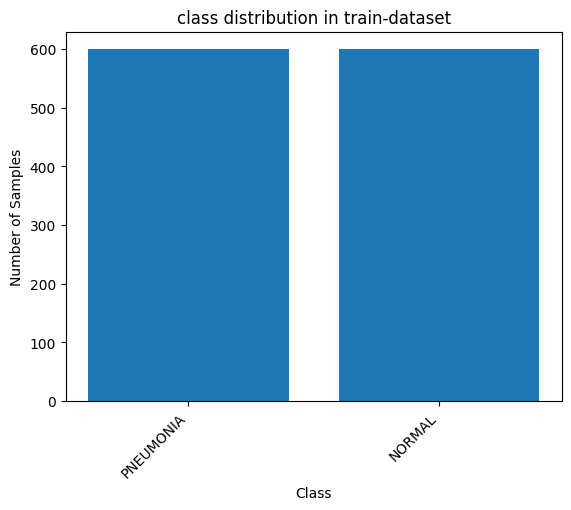

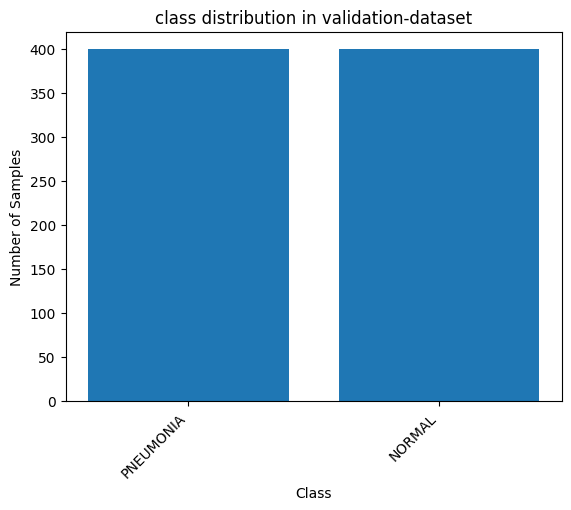

In [2]:
import shutil
import os
from dataset_splitter import copy_n_random_files
from plot_utils import plot_loss, plot_histogram_balance_of_dataset

train_data_dir = "../data/chest_xray/train/"
class1= "PNEUMONIA"
class2 = "NORMAL"
dest_folder1 = "../data/train_data_chest_xray_set_100"
dest_folder_train = os.path.join(dest_folder1, "train")
dest_folder_val = os.path.join(dest_folder1, "val")

train_split_ratio = 0.6

# Ensure folder is empty
if os.path.exists(dest_folder1):
    shutil.rmtree(dest_folder1)

copy_n_random_files(1000, os.path.join(train_data_dir, class1), os.path.join(dest_folder_train, class1), os.path.join(dest_folder_val, class1), train_split_ratio)
copy_n_random_files(1000, os.path.join(train_data_dir, class2), os.path.join(dest_folder_train, class2), os.path.join(dest_folder_val, class2), train_split_ratio)

plot_histogram_balance_of_dataset(dest_folder_train, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(dest_folder_val, "class distribution in validation-dataset")

## Train Model

In [6]:
from model import Model

batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_data_dir = dest_folder_train
val_data_dir = dest_folder_val
test_dir = "../data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_data_dir, val_dir=val_data_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir)

In [7]:
train_losses, val_losses = model.train_model(epochs)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x10d438790>
Traceback (most recent call last):
  File "/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/local/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/li

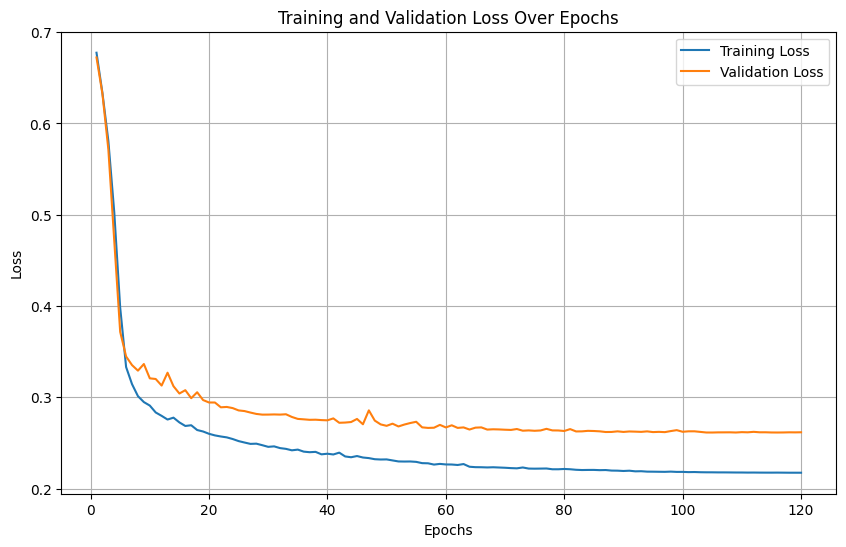

In [10]:
plot_loss(train_losses, val_losses)

In [11]:
import torch

torch.save(model.model.state_dict(), "../models/model_set_100.pth")